In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("echocardiogram.csv")
data.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1,Unnamed: 13
0,11,0,71,0,0.26,9,4.6,14,1,1,name,1,0,NaN
1,19,0,72,0,0.38,6,4.1,14,1.7,0.588,name,1,0,NaN
2,16,0,55,0,0.26,4,3.42,14,1,1,name,1,0,NaN
3,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,name,1,0,NaN
4,19,1,57,0,0.16,22,5.75,18,2.25,0.571,name,1,0,NaN


In [3]:
data = data.drop(['name','Unnamed: 13'], axis=1)
data.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,group,alive-at-1
0,11,0,71,0,0.26,9,4.6,14,1,1,1,0
1,19,0,72,0,0.38,6,4.1,14,1.7,0.588,1,0
2,16,0,55,0,0.26,4,3.42,14,1,1,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,1,0
4,19,1,57,0,0.16,22,5.75,18,2.25,0.571,1,0


In [4]:
data.tail(10)

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,group,alive-at-1
122,31,0,61,0,0.18,0,4.48,11,1.375,0.57,?,?
123,12,0,61,1,0.19,13.2,5.04,19,1.73,0.786,?,?
124,36,0,48,0,0.15,12,3.66,10,1,0.714,?,?
125,17,0,?,0,0.09,6.8,4.96,13,1.08,0.857,?,?
126,21,0,61,0,0.14,25.5,5.16,14,1.27,0.786,?,?
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,?,?
128,41,0,64,0,0.28,5.4,5.47,11,1.1,0.714,?,?
129,36,0,69,0,0.2,7,5.05,14.5,1.21,0.857,?,?
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,?,?
131,20,0,62,0,0.15,0,4.51,15.5,1.409,0.786,?,?


In [5]:
data.isnull().sum()

survival                 1
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
group                    0
alive-at-1               0
dtype: int64

In [6]:
data=data.replace('?',np.NaN)
data.tail(10)
data=data.replace('name',np.NaN)
data[47:53]

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,group,alive-at-1
47,20,1,59,0,0.03,21.3,6.29,17,1.31,0.928,2,0
48,0.25,1,63,1,NaN,NaN,NaN,23,2.3,0.714,2,1
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,2,NaN,2
50,2,1,56,1,0.04,14,5,NaN,NaN,NaN,2,1
51,7,1,61,1,0.27,NaN,NaN,9,1.5,0.428,2,1
52,10,0,57,0,0.24,14.8,5.26,18,1.38,0.812,2,NaN


In [7]:
data.isnull().sum()

survival                  2
still-alive               1
age-at-heart-attack       6
pericardial-effusion      0
fractional-shortening     8
epss                     15
lvdd                     11
wall-motion-score         4
wall-motion-index         2
mult                      3
group                    23
alive-at-1               57
dtype: int64

In [8]:
features_with_null = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in features_with_null:
    print(feature, ':', round(data[feature].isnull().mean(), 4), '%')

survival : 0.0152 %
still-alive : 0.0076 %
age-at-heart-attack : 0.0455 %
fractional-shortening : 0.0606 %
epss : 0.1136 %
lvdd : 0.0833 %
wall-motion-score : 0.0303 %
wall-motion-index : 0.0152 %
mult : 0.0227 %
group : 0.1742 %
alive-at-1 : 0.4318 %


In [9]:
for feature in features_with_null:
    print(feature, ':', data[feature].unique())

survival : ['11' '19' '16' '57' '26' '13' '50' '25' '10' '52' '44' '0.5' '24' '22'
 '1' '0.75' '5' '48' '29' '0.25' '36' '3' '27' '35' '31' '32' '40' '46'
 '2' '37' '19.5' '20' nan '7' '12' '45' '53' '38' '9' '49' '47' '41' '33'
 '15' '0.03' '23' '34' '21' '55' '4' '1.25' '28' '17' '7.5']
still-alive : ['0' '1' nan]
age-at-heart-attack : ['71' '72' '55' '60' '57' '68' '62' '46' '54' '77' '73' '69' '62.529' '66'
 '85' '64' '35' '75' '65' '52' nan '47' '63' '61' '80' '70' '79' '56' '67'
 '81' '59' '58' '51' '50' '78' '86' '74' '53' '48']
fractional-shortening : ['0.26' '0.38' '0.253' '0.16' '0.23' '0.33' '0.34' '0.14' '0.13' '0.45'
 '0.15' '0.12' '0.25' '0.07' '0.09' '0.22' '0.18' '0.17' '0.19' '0.3' nan
 '0.21' '0.4' '0.61' '0.06' '0.51' '0.41' '0.35' '0.27' '0.44' '0.03'
 '0.04' '0.24' '0.01' '0.29' '0.1' '0.187' '0.11' '0.36' '0.225' '0.217'
 '0.2' '0.05' '0.28' '0.155' '0.344' '0.272' '0.5' '0.258' '0.228' '0.036'
 '0.43']
epss : ['9' '6' '4' '12.062' '22' '5' '31' '8' '0' '13' '16' 

In [10]:
data = data.dropna(subset=['still-alive'])
data['still-alive'].isnull().sum()

0

In [11]:
discrete_features = ['pericardial-effusion']
continuous_features = data.drop(['pericardial-effusion', 'still-alive'], axis=1).columns
label = ['still-alive']

print(continuous_features)

Index(['survival', 'age-at-heart-attack', 'fractional-shortening', 'epss',
       'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'group',
       'alive-at-1'],
      dtype='object')


In [12]:
for feature in discrete_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [13]:
data=data.astype(np.float64)
data.dtypes

survival                 float64
still-alive              float64
age-at-heart-attack      float64
pericardial-effusion     float64
fractional-shortening    float64
epss                     float64
lvdd                     float64
wall-motion-score        float64
wall-motion-index        float64
mult                     float64
group                    float64
alive-at-1               float64
dtype: object

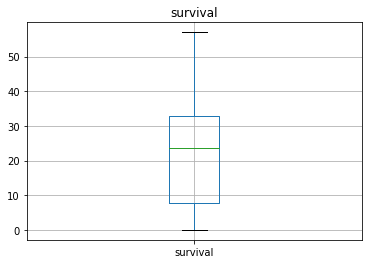

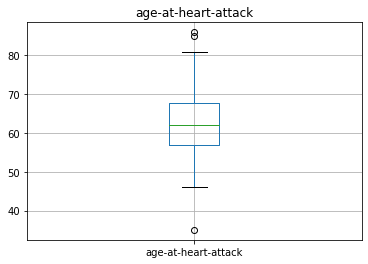

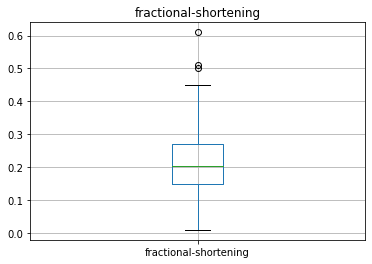

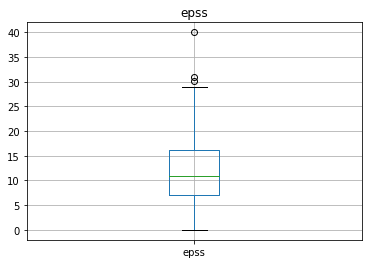

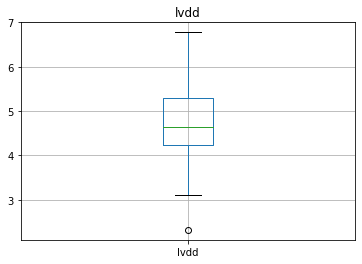

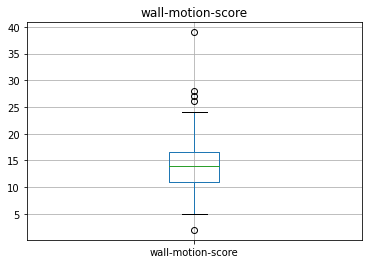

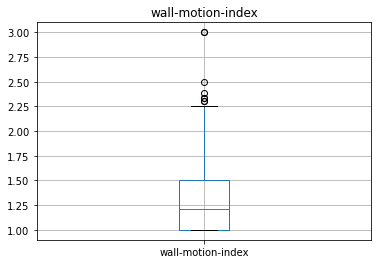

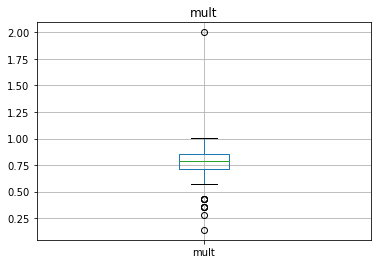

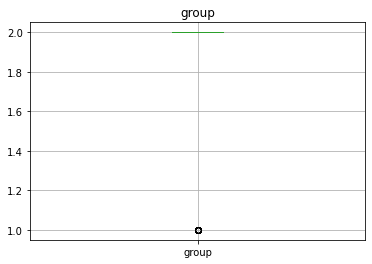

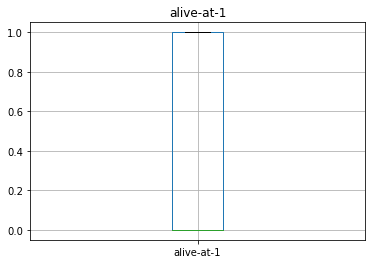

In [14]:
for feature in continuous_features:
    data.boxplot(feature)
    plt.title(feature)
    plt.show()

In [15]:

data['pericardial-effusion']=data['pericardial-effusion'].astype(np.int64)

In [16]:
features_with_outliers = ['wallmotion-score', 'wallmotion-index', 'mult']

In [17]:
for feature in continuous_features:
    if feature in features_with_outliers:
        data[feature].fillna(data[feature].median(),inplace=True)
    else:
        data[feature].fillna(data[feature].mean(),inplace=True)        

In [18]:
data.isnull().sum()

survival                 0
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
group                    0
alive-at-1               0
dtype: int64

In [19]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_rows = lof.fit_predict(data)

In [20]:

mask = outliers_rows != -1

In [21]:
data.isnull().sum()


survival                 0
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
group                    0
alive-at-1               0
dtype: int64

In [22]:
data = data[mask]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
discrete_feature = ['pericardial-effusion']
continuous_feature = data.drop(['pericardial-effusion', 'still-alive'], axis=1)
label = ['still-alive']

print(continuous_features)

Index(['survival', 'age-at-heart-attack', 'fractional-shortening', 'epss',
       'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'group',
       'alive-at-1'],
      dtype='object')


In [25]:
continuous_features.isnull().sum()

0

In [26]:
from sklearn.preprocessing import StandardScaler
data1 = pd.get_dummies(data, columns = discrete_features, drop_first = True)
scaler = StandardScaler()
data1[continuous_features] = scaler.fit_transform(data1[continuous_features])

In [27]:
data1.head()

,survival,still-alive,age-at-heart-attack,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,group,alive-at-1,pericardial-effusion_1
0,-0.729968,0.0,1.039461,0.419602,-0.470229,-0.190540,-0.053021,-0.859949,1.156755,-2.076063,-0.914411,0
1,-0.221716,0.0,1.170502,1.580619,-0.940477,-0.839869,-0.053021,0.767397,-0.939966,-2.076063,-0.914411,0
2,-0.412311,0.0,-1.057203,0.419602,-1.253976,-1.722956,-0.053021,-0.859949,1.156755,-2.076063,-0.914411,0
3,2.192480,0.0,-0.401996,0.351875,0.009737,-0.186644,0.390069,0.186202,0.077860,-2.076063,-0.914411,0
4,-0.221716,1.0,-0.795120,-0.547913,1.567512,1.302915,0.833159,2.046025,-1.026482,-2.076063,-0.914411,0


In [28]:
X = data1.drop(['still-alive'],axis=1)
y = data1['still-alive']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((88, 11), (39, 11))

In [30]:
accuracy = {}

In [31]:
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy['Logistic Regression'] = accuracy_score(y_test, y_pred1)*100

0.8717948717948718


In [32]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_leaf=10, random_state=40)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy['Decsision Tree'] = accuracy_score(y_test, y_pred2)*100

0.9230769230769231


In [33]:
model3 = RandomForestClassifier(max_depth=6)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy['Random Forest'] = accuracy_score(y_test, y_pred3)*100

0.9230769230769231


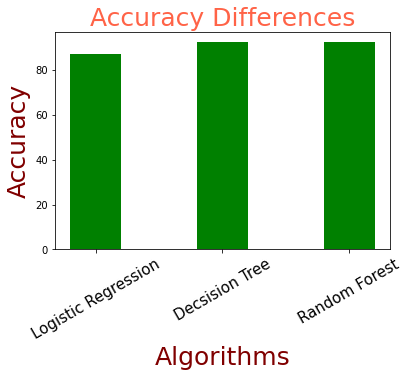

In [34]:
plt.figure(figsize=(6,4))
algos = list(accuracy.keys())
accu_val = list(accuracy.values())

plt.bar(algos, accu_val,width=0.4,color='green')
plt.title('Accuracy Differences',fontsize=25,color='tomato')
plt.xlabel('Algorithms',fontsize=25,color='maroon')
plt.ylabel('Accuracy',fontsize=25,color='maroon')
plt.xticks(rotation=30,color='black',fontsize=15)
plt.show()